<img src="./Logo_UNSAM.png" align="right" width="150" />

#### Procesamiento Digital de Señales
# Trabajo Práctico Nº3
#### Lucas Marú

# Enunciado

En esta tarea semanal retomamos la consigna de la tarea anterior, donde simulamos el bloque de cuantización de un ADC de B bits en un rango de  ±VF
 Volts. Ahora vamos a completar la simulación del ADC incluyendo la capacidad de muestrear a fs Hertz.

Para ello se simulará el comportamiento del dispositivo al digitalizar una senoidal contaminada con un nivel predeterminado de ruido. Comenzaremos describiendo los parámetros a ajustar de la senoidal:

* frecuencia f0 arbitraria, por ejemplo f0=fS/N=Δf
 
* energía normalizada, es decir energía (o varianza) unitaria

Con respecto a los parámetros de la secuencia de ruido, diremos que:

* será de carácter aditivo, es decir la señal que entra al ADC será sR=s+n. Siendo n la secuencia que simula la interferencia, y s la senoidal descrita anteriormente.
* La potencia del ruido será $ P_n = K_n . P_q $ [W] siendo el factor k una escala para la potencia del ruido de cuantización $ P_q = \frac{q^2}{12} $
* finalmente, n será incorrelado y Gaussiano
El ADC que deseamos simular trabajará a una frecuencia de muestreo fS=1000 Hz y tendrá un rango analógico de ±VF=2
Volts.

Se pide:

a) Generar el siguiente resultado producto de la experimentación. B = 4 bits, kn=1.
<div style="display: flex; justify-content: center; align-items: center;">
  <img src="tiempo.png" width="310" style="margin-right: 5px;"/>
  <img src="espectro.png" width="310" style="margin-right: 5px;"/>
  <img src="histograma.png" width="310"/>
</div>



b) Analizar para una de las siguientes configuraciones B = ̣{4, 8 y 16} bits, kn={1/10,1,10}. Discutir los resultados respecto a lo obtenido en a).

## Item a)

Código que genera la senoidal, la normaliza en energía, genera y suma el ruido. Luego transforma la señal en el tiempo a su dominio frecuencial. Por último muestra los resultados en el tiempo en la frecuencia y tambien el histograma solicitado para observar la distribución del ruido. Como el segundo punto nos pide realizar comparaciones redefino el código en forma de función para que me permite modificar parametros facilmente. La función recibe los siguientes datos:
* fo: frecuencia de la senoidal
* fs: frecuencia de sampleo del ADC
* N: cantidad de muestras
* Vref: voltaje de referencia V+ / V- del ADC 
* B: bits de palabra del ADC
* kn: escala de la potencia para la simulación del ruido analógico


<>:40: SyntaxWarning: invalid escape sequence '\p'
<>:58: SyntaxWarning: invalid escape sequence '\{'
<>:61: SyntaxWarning: invalid escape sequence '\o'
<>:62: SyntaxWarning: invalid escape sequence '\o'
<>:65: SyntaxWarning: invalid escape sequence '\p'
<>:75: SyntaxWarning: invalid escape sequence '\p'
<>:40: SyntaxWarning: invalid escape sequence '\p'
<>:58: SyntaxWarning: invalid escape sequence '\{'
<>:61: SyntaxWarning: invalid escape sequence '\o'
<>:62: SyntaxWarning: invalid escape sequence '\o'
<>:65: SyntaxWarning: invalid escape sequence '\p'
<>:75: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_27188/1054154387.py:40: SyntaxWarning: invalid escape sequence '\p'
  plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vref, q) )
/tmp/ipykernel_27188/1054154387.py:58: SyntaxWarning: invalid escape sequence '\{'
  plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Srq[bfrec])**2), lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\}$' )

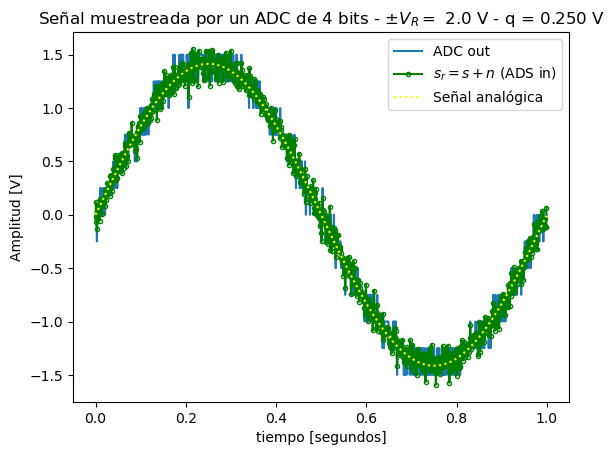

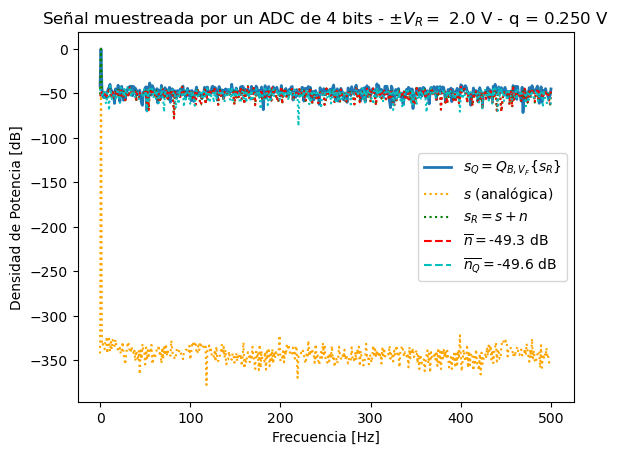

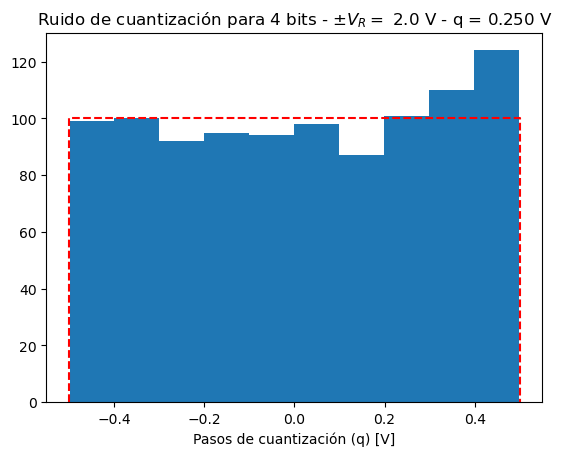

In [8]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Apr  2 19:08:16 2025

@author: lmaru
"""

import numpy as np
import matplotlib.pyplot as plt
import math

def experimento_adc(fo, fs, N, Vref, B, kn):
    # Paso 1: Tiempo y señal analógica
    ts=1/fs
    df = fs/N # resolución espectral
    t = np.linspace(0, (N-1)*ts, N).flatten()
    A = math.sqrt(2) # proceso de normalización 
    analog_sig = A*np.sin(2 * np.pi * fo * t)
    
    # Paso 2: Ruido
    q = Vref / (2**(B-1))
    pot_ruido_cuant = (q**2)/12# Watts, intrinseco del ADC
    pot_ruido_analog = pot_ruido_cuant * kn # Simulamos un ruido analogico
    sigma = math.sqrt(pot_ruido_analog)
    ruido = np.random.normal(0,sigma,N) # media, sigma y cantidad
    sr = analog_sig + ruido
    

    # Paso 3: Cuantización
    srq = q * np.round(sr / q) # esta sola linea modela la cuantizaciòn 
    nn = sr - analog_sig  # señal de ruido de analógico
    nq = srq - sr         # señal de ruido de cuantización
    
    # Paso 4: Gráfica señal analógica + muestreada + cuantizada
    plt.figure(1)
    plt.plot(t, srq, label='ADC out')
    plt.plot(t, sr, color='green', ls='-',marker='o', markersize=3, fillstyle='none', label='$ s_r = s +n $ (ADS in)')
    plt.plot(t, analog_sig, color='yellow',linestyle='dotted', label='Señal analógica')
    plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vref, q) )
    plt.xlabel('tiempo [segundos]')
    plt.ylabel('Amplitud [V]')
    plt.legend()
    
    # Paso 5: FFT (para espectros)
    ft_SR = 1/N*np.fft.fft( sr)         #escalamiento no es importante (1/N)
    ft_Srq = 1/N*np.fft.fft( srq)
    ft_As = 1/N*np.fft.fft( analog_sig)
    ft_Nq = 1/N*np.fft.fft( nq)
    ft_Nn = 1/N*np.fft.fft( nn)
    ff = np.linspace(0, (N-1)*df, N)    # grilla de sampleo frecuencial
    bfrec = ff <= fs/2                  # vector booleano mitad True, mitad False

    Nnq_mean = np.mean(np.abs(ft_Nq)**2)
    nNn_mean = np.mean(np.abs(ft_Nn)**2)
    
    plt.figure(2)
    plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Srq[bfrec])**2), lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\}$' )
    plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_As[bfrec])**2), color='orange', ls='dotted', label='$ s $ (analógica)' )
    plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_SR[bfrec])**2), ':g', label='$ s_R = s + n $' )
    plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([nNn_mean, nNn_mean]) ), '--r', label= '$ \overline{n} = $' + '{:3.1f} dB'.format(10* np.log10(2* nNn_mean)) )
    plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([Nnq_mean, Nnq_mean]) ), '--c', label='$ \overline{n_Q} = $' + '{:3.1f} dB'.format(10* np.log10(2* Nnq_mean)) )
    plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nn[bfrec])**2), ':r')
    plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nq[bfrec])**2), ':c')
    plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vref, q) )
    plt.ylabel('Densidad de Potencia [dB]')
    plt.xlabel('Frecuencia [Hz]')
    plt.legend()

    # Paso 6: Histograma de cuantización
    plt.figure(3)
    bins = 10
    plt.hist(nq.flatten()/(q), bins=bins)
    plt.plot( np.array([-1/2, -1/2, 1/2, 1/2]), np.array([0, N/bins, N/bins, 0]), '--r' )
    plt.title( 'Ruido de cuantización para {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vref, q))
    plt.xlabel('Pasos de cuantización (q) [V]')
    
experimento_adc(fo=1, fs=1000, N=1000, Vref=2.0, B=4, kn=1)




## Item b)

Analizo la siguiente configuración: B= 8 bits y $k_n$=10.


<>:40: SyntaxWarning: invalid escape sequence '\p'
<>:58: SyntaxWarning: invalid escape sequence '\{'
<>:61: SyntaxWarning: invalid escape sequence '\o'
<>:62: SyntaxWarning: invalid escape sequence '\o'
<>:65: SyntaxWarning: invalid escape sequence '\p'
<>:75: SyntaxWarning: invalid escape sequence '\p'
<>:40: SyntaxWarning: invalid escape sequence '\p'
<>:58: SyntaxWarning: invalid escape sequence '\{'
<>:61: SyntaxWarning: invalid escape sequence '\o'
<>:62: SyntaxWarning: invalid escape sequence '\o'
<>:65: SyntaxWarning: invalid escape sequence '\p'
<>:75: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_27188/2227220550.py:40: SyntaxWarning: invalid escape sequence '\p'
  plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vref, q) )
/tmp/ipykernel_27188/2227220550.py:58: SyntaxWarning: invalid escape sequence '\{'
  plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Srq[bfrec])**2), lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\}$' )

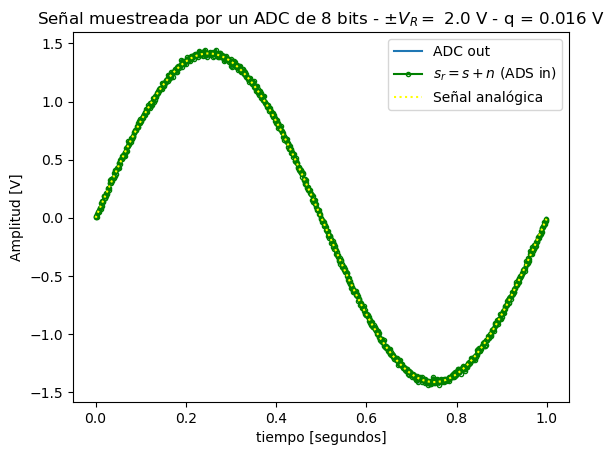

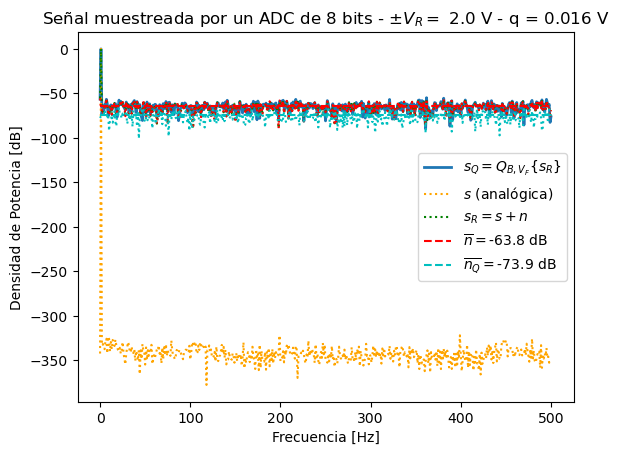

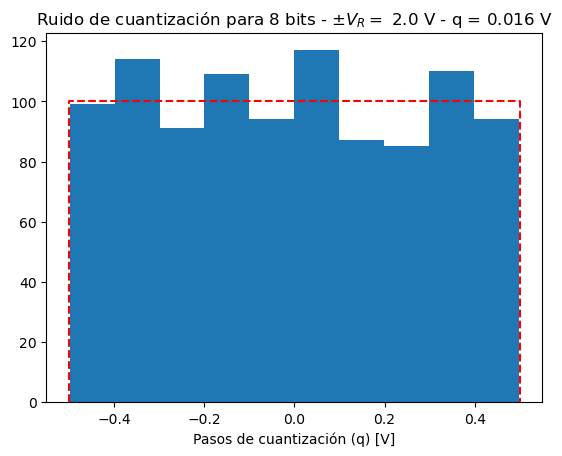

In [7]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Apr  2 19:08:16 2025

@author: lmaru
"""

import numpy as np
import matplotlib.pyplot as plt
import math

def experimento_adc(fo, fs, N, Vref, B, kn):
    # Paso 1: Tiempo y señal analógica
    ts=1/fs
    df = fs/N # resolución espectral
    t = np.linspace(0, (N-1)*ts, N).flatten()
    A = math.sqrt(2) # proceso de normalización 
    analog_sig = A*np.sin(2 * np.pi * fo * t)
    
    # Paso 2: Ruido
    q = Vref / (2**(B-1))
    pot_ruido_cuant = (q**2)/12# Watts, intrinseco del ADC
    pot_ruido_analog = pot_ruido_cuant * kn # Simulamos un ruido analogico
    sigma = math.sqrt(pot_ruido_analog)
    ruido = np.random.normal(0,sigma,N) # media, sigma y cantidad
    sr = analog_sig + ruido
    

    # Paso 3: Cuantización
    srq = q * np.round(sr / q) # esta sola linea modela la cuantizaciòn 
    nn = sr - analog_sig  # señal de ruido de analógico
    nq = srq - sr         # señal de ruido de cuantización
    
    # Paso 4: Gráfica señal analógica + muestreada + cuantizada
    plt.figure(1)
    plt.plot(t, srq, label='ADC out')
    plt.plot(t, sr, color='green', ls='-',marker='o', markersize=3, fillstyle='none', label='$ s_r = s +n $ (ADS in)')
    plt.plot(t, analog_sig, color='yellow',linestyle='dotted', label='Señal analógica')
    plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vref, q) )
    plt.xlabel('tiempo [segundos]')
    plt.ylabel('Amplitud [V]')
    plt.legend()
    
    # Paso 5: FFT (para espectros)
    ft_SR = 1/N*np.fft.fft( sr)         #escalamiento no es importante (1/N)
    ft_Srq = 1/N*np.fft.fft( srq)
    ft_As = 1/N*np.fft.fft( analog_sig)
    ft_Nq = 1/N*np.fft.fft( nq)
    ft_Nn = 1/N*np.fft.fft( nn)
    ff = np.linspace(0, (N-1)*df, N)    # grilla de sampleo frecuencial
    bfrec = ff <= fs/2                  # vector booleano mitad True, mitad False

    Nnq_mean = np.mean(np.abs(ft_Nq)**2)
    nNn_mean = np.mean(np.abs(ft_Nn)**2)
    
    plt.figure(2)
    plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Srq[bfrec])**2), lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\}$' )
    plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_As[bfrec])**2), color='orange', ls='dotted', label='$ s $ (analógica)' )
    plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_SR[bfrec])**2), ':g', label='$ s_R = s + n $' )
    plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([nNn_mean, nNn_mean]) ), '--r', label= '$ \overline{n} = $' + '{:3.1f} dB'.format(10* np.log10(2* nNn_mean)) )
    plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([Nnq_mean, Nnq_mean]) ), '--c', label='$ \overline{n_Q} = $' + '{:3.1f} dB'.format(10* np.log10(2* Nnq_mean)) )
    plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nn[bfrec])**2), ':r')
    plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nq[bfrec])**2), ':c')
    plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vref, q) )
    plt.ylabel('Densidad de Potencia [dB]')
    plt.xlabel('Frecuencia [Hz]')
    plt.legend()

    # Paso 6: Histograma de cuantización
    plt.figure(3)
    bins = 10
    plt.hist(nq.flatten()/(q), bins=bins)
    plt.plot( np.array([-1/2, -1/2, 1/2, 1/2]), np.array([0, N/bins, N/bins, 0]), '--r' )
    plt.title( 'Ruido de cuantización para {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vref, q))
    plt.xlabel('Pasos de cuantización (q) [V]')
    
experimento_adc(fo=1, fs=1000, N=1000, Vref=2.0, B=8, kn=10)
